<a href="https://colab.research.google.com/github/beniamine3155/deep_learning_tensorflow/blob/main/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks and Computer Vision

## Get the Data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-07-25 16:54:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.207, 209.85.200.207, 74.125.126.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  84.1MB/s    in 1.2s    

2024-07-25 16:54:19 (84.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
# view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


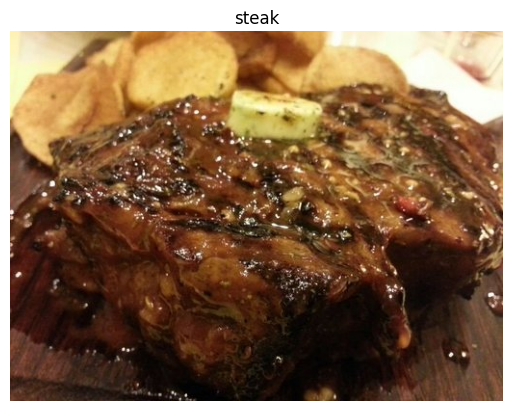

In [9]:
# view a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

array([[[255, 240, 180],
        [255, 240, 180],
        [255, 240, 180],
        ...,
        [237, 211, 176],
        [243, 217, 184],
        [247, 221, 188]],

       [[255, 240, 180],
        [255, 240, 180],
        [255, 240, 180],
        ...,
        [244, 218, 183],
        [247, 221, 188],
        [249, 225, 191]],

       [[255, 240, 181],
        [255, 240, 181],
        [255, 240, 181],
        ...,
        [250, 226, 192],
        [252, 227, 196],
        [252, 229, 197]],

       ...,

       [[ 99,  56,  39],
        [106,  63,  46],
        [112,  69,  52],
        ...,
        [131,  90,  70],
        [134,  93,  73],
        [125,  87,  66]],

       [[108,  65,  48],
        [111,  68,  51],
        [112,  69,  52],
        ...,
        [132,  91,  73],
        [134,  93,  75],
        [124,  86,  67]],

       [[115,  72,  55],
        [115,  72,  55],
        [111,  68,  51],
        ...,
        [126,  85,  67],
        [127,  86,  68],
        [117,  79,  60]]], dtype=uint8)
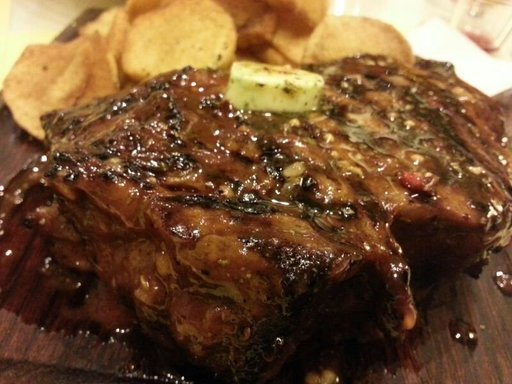

In [10]:
# View the img (actually just a big array/tensor)
img

In [11]:
img.shape

(384, 512, 3)

In [13]:
# Get all the pixel values between 0 & 1
img/255

array([[[1.        , 0.94117647, 0.70588235],
        [1.        , 0.94117647, 0.70588235],
        [1.        , 0.94117647, 0.70588235],
        ...,
        [0.92941176, 0.82745098, 0.69019608],
        [0.95294118, 0.85098039, 0.72156863],
        [0.96862745, 0.86666667, 0.7372549 ]],

       [[1.        , 0.94117647, 0.70588235],
        [1.        , 0.94117647, 0.70588235],
        [1.        , 0.94117647, 0.70588235],
        ...,
        [0.95686275, 0.85490196, 0.71764706],
        [0.96862745, 0.86666667, 0.7372549 ],
        [0.97647059, 0.88235294, 0.74901961]],

       [[1.        , 0.94117647, 0.70980392],
        [1.        , 0.94117647, 0.70980392],
        [1.        , 0.94117647, 0.70980392],
        ...,
        [0.98039216, 0.88627451, 0.75294118],
        [0.98823529, 0.89019608, 0.76862745],
        [0.98823529, 0.89803922, 0.77254902]],

       ...,

       [[0.38823529, 0.21960784, 0.15294118],
        [0.41568627, 0.24705882, 0.18039216],
        [0.43921569, 0

## Example

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# set the test and train directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    seed=42
)

# create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))





Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 106s 2s/step - loss: 0.5958 - accuracy: 0.6693 - val_loss: 0.4216 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 95s 2s/step - loss: 0.4640 - accuracy: 0.7887 - val_loss: 0.3872 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 96s 2s/step - loss: 0.4171 - accuracy: 0.8147 - val_loss: 0.3472 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 94s 2s/step - loss: 0.3992 - accuracy: 0.8220 - val_loss: 0.3717 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 95s 2s/step - loss: 0.3872 - accuracy: 0.8420 - val_loss: 0.3248 - val_accuracy: 0.8780


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 194ms/step - loss: 0.5909 - accuracy: 0.6893 - val_loss: 0.5103 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.5522 - accuracy: 0.7353 - val_loss: 0.5464 - val_accuracy: 0.7200
Epoch 3/5
47/47 [==============================] - 7s 148ms/step - loss: 0.5058 - accuracy: 0.7753 - val_loss: 0.4646 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4758 - accuracy: 0.7733 - val_loss: 0.4692 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 7s 160ms/step - loss: 0.4693 - accuracy: 0.7893 - val_loss: 0.4607 - val_accuracy: 0.7840


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 369ms/step - loss: 2.5301 - accuracy: 0.5847 - val_loss: 1.2093 - val_accuracy: 0.6480
Epoch 2/5
47/47 [==============================] - 18s 389ms/step - loss: 0.6917 - accuracy: 0.7180 - val_loss: 0.5098 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 18s 387ms/step - loss: 0.5356 - accuracy: 0.7573 - val_loss: 0.8972 - val_accuracy: 0.5080
Epoch 4/5
47/47 [==============================] - 17s 360ms/step - loss: 0.7534 - accuracy: 0.7173 - val_loss: 0.4687 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 17s 361ms/step - loss: 0.4772 - accuracy: 0.7793 - val_loss: 0.5044 - val_accuracy: 0.7600


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


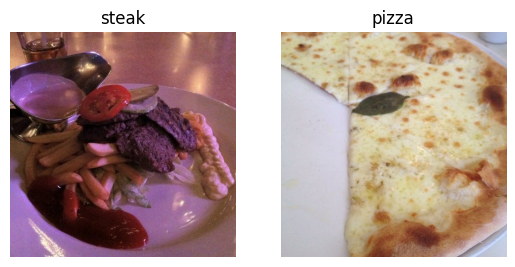

In [20]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [21]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [22]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [25]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [26]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

In [28]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [31]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [32]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [33]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 119s 3s/step - loss: 0.7407 - accuracy: 0.6773 - val_loss: 0.4281 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 109s 2s/step - loss: 0.4476 - accuracy: 0.7920 - val_loss: 0.4186 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 107s 2s/step - loss: 0.3859 - accuracy: 0.8387 - val_loss: 0.3451 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 109s 2s/step - loss: 0.3083 - accuracy: 0.8860 - val_loss: 0.3592 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 109s 2s/step - loss: 0.2170 - accuracy: 0.9247 - val_loss: 0.3793 - val_accuracy: 0.8360


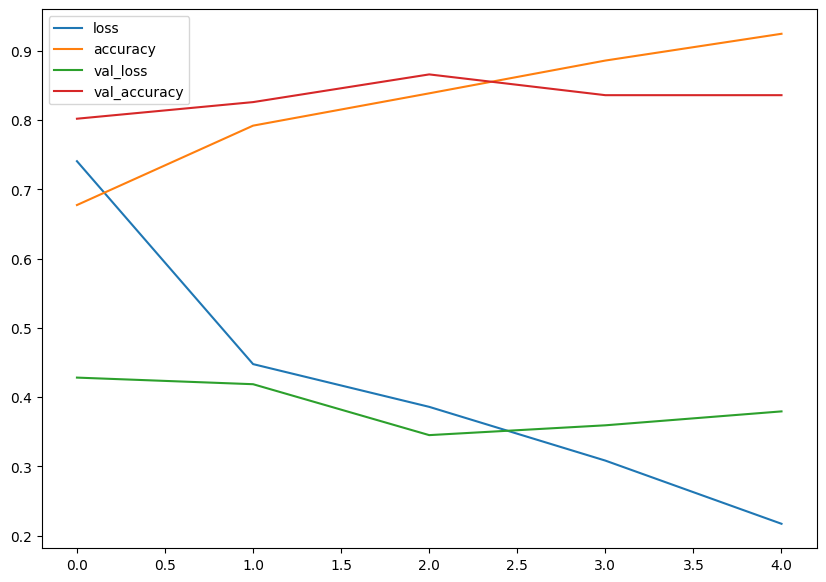

In [34]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [35]:
# Plot the validation and training data separately
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

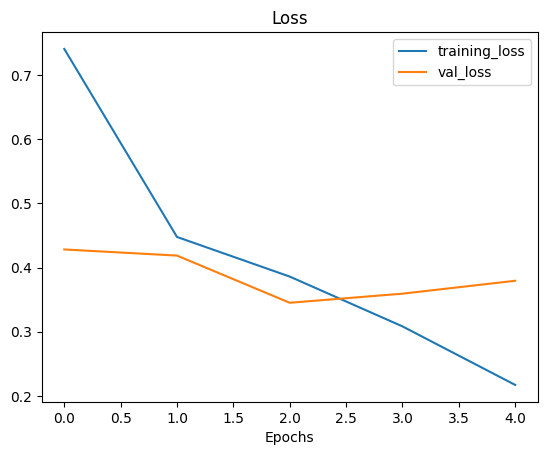

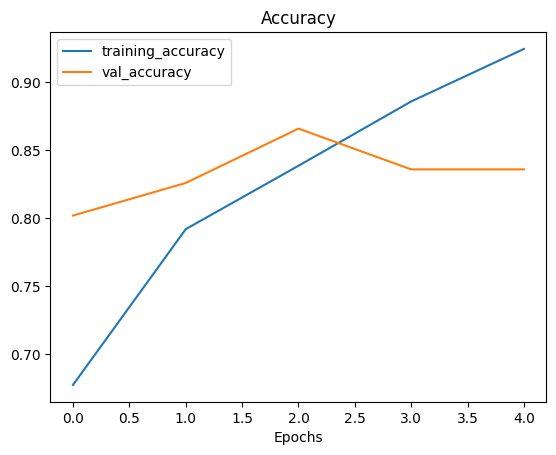

In [36]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [37]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 48s 993ms/step - loss: 0.6061 - accuracy: 0.6593 - val_loss: 0.4836 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 46s 984ms/step - loss: 0.4764 - accuracy: 0.7840 - val_loss: 0.4047 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 54s 1s/step - loss: 0.4778 - accuracy: 0.7840 - val_loss: 0.4409 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 49s 1s/step - loss: 0.4327 - accuracy: 0.8080 - val_loss: 0.3418 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 47s 995ms/step - loss: 0.3758 - accuracy: 0.8300 - val_loss: 0.3307 - val_accuracy: 0.8580


In [40]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 10)       

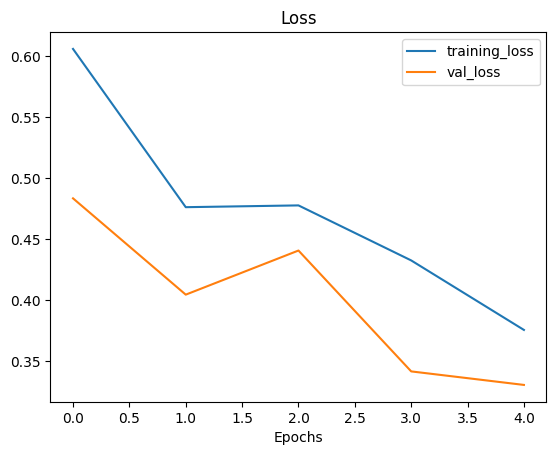

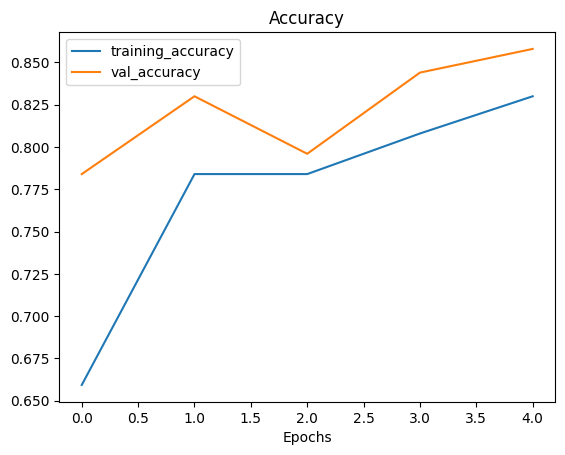

In [41]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)